<a href="https://colab.research.google.com/github/Kenz2000/Projet-DATA2/blob/kenza_vf/estimate_k_classic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations des librairies

In [55]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.64 s (started: 2023-05-18 21:52:57 +00:00)


In [56]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.96 s (started: 2023-05-18 21:53:04 +00:00)


In [57]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.84 s (started: 2023-05-18 21:53:13 +00:00)


In [58]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 9.59 s (started: 2023-05-18 21:53:20 +00:00)


In [59]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 10.3 s (started: 2023-05-18 21:53:29 +00:00)


In [60]:
pip install tables

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.48 s (started: 2023-05-18 21:53:40 +00:00)


In [61]:
pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 8.86 s (started: 2023-05-18 21:53:46 +00:00)


In [62]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.04 s (started: 2023-05-18 21:53:55 +00:00)


In [63]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 8.31 s (started: 2023-05-18 21:54:01 +00:00)


In [64]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.56 s (started: 2023-05-18 21:54:10 +00:00)


# Chargement des utilitaires et des données

In [65]:
! gdown 'https://drive.google.com/uc?id=1zTDcgnFtQWUeXgIce4O2Z2OPn0vJH1aD'

Downloading...
From: https://drive.google.com/uc?id=1zTDcgnFtQWUeXgIce4O2Z2OPn0vJH1aD
To: /content/utils_py.py
100% 6.69k/6.69k [00:00<00:00, 18.0MB/s]
time: 1.32 s (started: 2023-05-18 21:54:16 +00:00)


In [66]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import warnings
import re

from utils_py import static_document_embeddings, tokenize_re

time: 921 µs (started: 2023-05-18 21:54:17 +00:00)


In [67]:
## classic4
! gdown "https://drive.google.com/uc?id=1270jrqfjC_j9jbujB8n6bTovnqCBG1Xp"
! gdown "https://drive.google.com/uc?id=1-0eXYefFHTliAuFfrRX8g2gnkYlF3Z5H"
! gdown "https://drive.google.com/uc?id=1-DAowc4ysRC9wDy60lzs8I6FIhLE4BEb"
! gdown "https://drive.google.com/uc?id=1-ckFmuejFrNGx0mbhqwNIhewCeuOfGxs"
! gdown "https://drive.google.com/uc?id=1vKduM6oCoGWWiXZrn1P33rnu74YbJJ2T"


Downloading...
From: https://drive.google.com/uc?id=1270jrqfjC_j9jbujB8n6bTovnqCBG1Xp
To: /content/classic4_word2vec.h5
100% 17.1M/17.1M [00:00<00:00, 110MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-0eXYefFHTliAuFfrRX8g2gnkYlF3Z5H
To: /content/classic4_glove.h5
100% 17.1M/17.1M [00:00<00:00, 80.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-DAowc4ysRC9wDy60lzs8I6FIhLE4BEb
To: /content/classic4_bert.h5
100% 262M/262M [00:02<00:00, 90.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-ckFmuejFrNGx0mbhqwNIhewCeuOfGxs
To: /content/classic4_roberta.h5
100% 262M/262M [00:02<00:00, 87.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vKduM6oCoGWWiXZrn1P33rnu74YbJJ2T
To: /content/classic4.csv
100% 5.02M/5.02M [00:00<00:00, 132MB/s]
time: 27.4 s (started: 2023-05-18 21:54:17 +00:00)


In [68]:
classic4_word2vec = pd.read_hdf("classic4_word2vec.h5").to_numpy()
classic4_glove = pd.read_hdf("classic4_glove.h5").to_numpy()
classic4_bert = pd.read_hdf("classic4_bert.h5").to_numpy()
classic4_roberta = pd.read_hdf("classic4_roberta.h5").to_numpy()

time: 2.89 s (started: 2023-05-18 21:54:45 +00:00)


In [69]:
classic4_texts = pd.read_csv("classic4.csv")["text"].values
classic4_labels = pd.read_csv("classic4.csv")["label"].values
k_classic4 = len(set(classic4_labels))

time: 191 ms (started: 2023-05-18 21:54:48 +00:00)


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from scipy.special import rel_entr
from sklearn.metrics import silhouette_score, adjusted_rand_score

time: 3.1 ms (started: 2023-05-18 21:54:48 +00:00)


# Comparaison avec Kmeans

Cette méthode permet de déterminer le nombre de clusters en utilisant plusieurs critères tels que la silhouette, Davies-Bouldin (DB), l'inertie, l'ARI (Adjusted Rand Index) et le Calinski-Harabasz (CH) avec la méthode de clustering K-means. En variant le nombre de classes de 2 à 10, les résultats sont visualisés à l'aide d'un graphique qui affiche les scores obtenus pour chaque critère.

In [71]:
def estimate_k(X,true_labels):
  d=dict()
  liste_silhouette =[]
  liste_davies =[]
  liste_ch =[]
  sse=[]
  ari_scores=[]
  
  no_of_clusters = [2, 3, 4, 5, 6,7,8,9,10]
  for n_clusters in no_of_clusters:
        cluster = KMeans(n_clusters = n_clusters,max_iter=100, init='k-means++', n_init=20)
        cluster_labels = cluster.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        liste_silhouette.append(silhouette_avg)
        dbs=davies_bouldin_score(X, cluster_labels)
        liste_davies.append(dbs)
        ch=metrics.calinski_harabasz_score(X, cluster_labels)
        liste_ch.append(ch)
        sse.append(cluster.inertia_)
        ari = adjusted_rand_score(true_labels,cluster_labels)
        ari_scores.append(ari)
  import matplotlib.pyplot as plt

  plt.style.use("fivethirtyeight")
  plt.figure(figsize=(5,4))
  plt.plot(no_of_clusters, liste_silhouette,c="#008fd5",label="Silhouette Coefficient" )
  plt.plot(no_of_clusters, ari_scores, c="#fc4f30", label="ARI")
  plt.plot(no_of_clusters, liste_davies, c="#00ff00", label="Davies_bouldin (DB)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec Kmeans) :silhouette ,DB,ARI")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 4))
  plt.plot(no_of_clusters, liste_ch, c="#a020f0", label="Calinski_harabasz(CH)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec Kmeans) :CH")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 4))
  plt.plot(no_of_clusters, sse, c="#ffa500", label="SSE")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec Kmeans) :SSE")
  plt.tight_layout()
  plt.show()

time: 3.62 ms (started: 2023-05-18 21:54:48 +00:00)


## Classic4 avec word2vec 

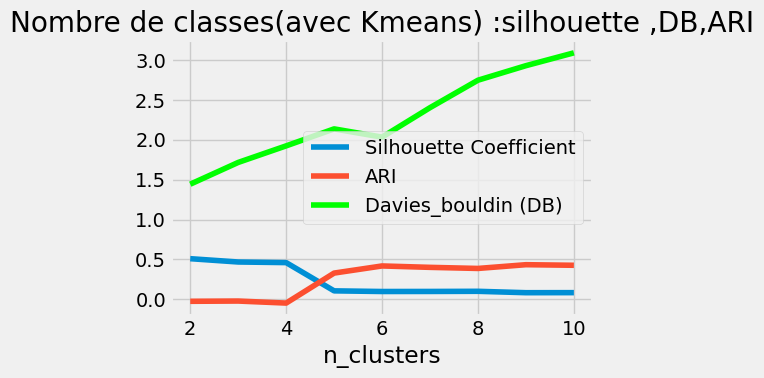

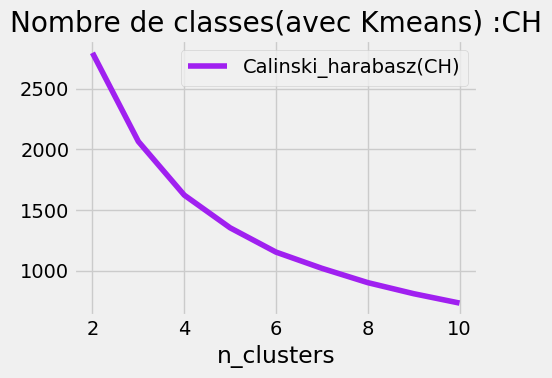

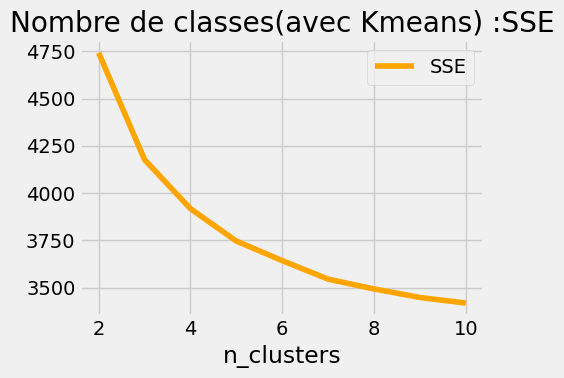

time: 60 s (started: 2023-05-18 21:54:48 +00:00)


In [72]:
estimate_k(classic4_word2vec,classic4_labels)

En analysant les résultats du clustering basé sur K-means avec la représentation word2vec, nous constatons que différents critères suggèrent des nombres de clusters légèrement différents. Le critère CH et le critère SSE indiquent un nombre de clusters égal à 4, ce qui correspond à la vraie valeur pour ce dataset. Le critère DB suggère un nombre de clusters égal à 6, tandis que les critères de silhouette et ARI suggèrent un nombre de clusters égal à 5. Cependant, dans l'ensemble, les résultats des différents critères sont assez proches les uns des autres, ce qui est rassurant et peut indiquer une certaine stabilité dans les résultats du clustering.

## Classic4 avec la représentation Glove

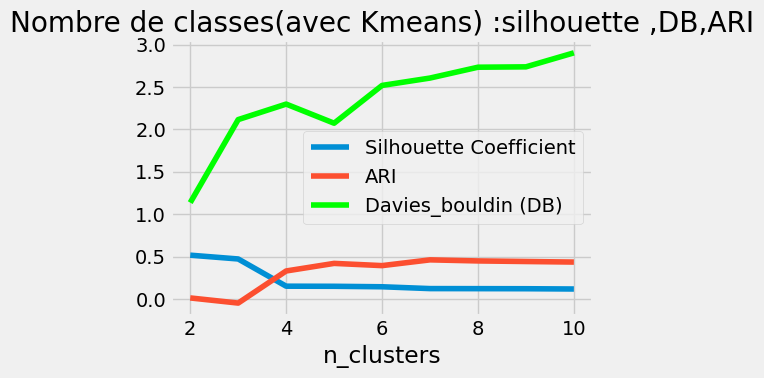

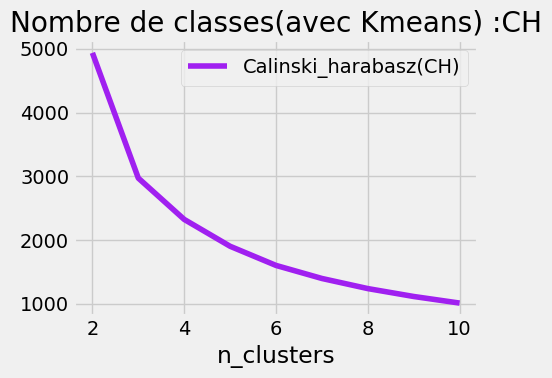

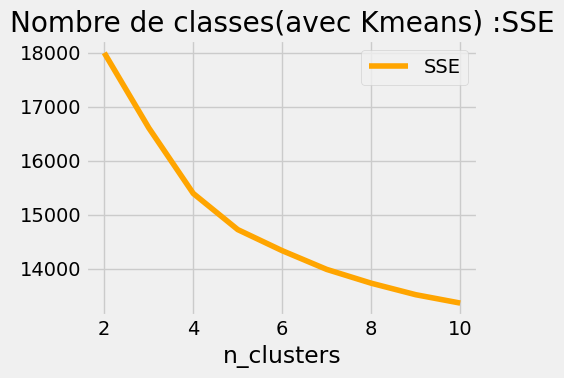

time: 57.7 s (started: 2023-05-18 21:55:48 +00:00)


In [73]:
estimate_k(classic4_glove,classic4_labels)

En analysant les résultats du clustering basé sur K-means avec la représentation Glove, nous observons que les différents critères fournissent des estimations variées du nombre de clusters. Le critère ARI, le critère de silhouette et le critère DB suggèrent tous un nombre de clusters égal à 4, ce qui correspond à la véritable valeur pour ce dataset. Cependant, le critère CH suggère un nombre de clusters égal à 3, tandis que le critère SSE suggère un nombre de clusters égal à 5, ce qui ne correspond pas exactement à la véritable valeur. Il est donc clair que certains critères ne permettent pas d'identifier de manière précise le nombre de clusters pour cette représentation Glove. Des tests supplémentaires seront nécessaires pour déterminer le nombre optimal de clusters.

# Comparaison avec CAH(ward)

Cette méthode permet de déterminer le nombre de clusters en utilisant plusieurs critères tels que la silhouette, Davies-Bouldin (DB), l'inertie, l'ARI (Adjusted Rand Index) et le Calinski-Harabasz (CH) avec la méthode de clustering CAH avec le linkage =ward . En variant le nombre de classes de 2 à 10, les résultats sont visualisés à l'aide d'un graphique qui affiche les scores obtenus pour chaque critère.

In [74]:
from sklearn.cluster import AgglomerativeClustering
def estimate_k_cah(X,true_labels):
  d=dict()
  liste_silhouette =[]
  liste_davies =[]
  liste_ch =[]
  sse=[]
  ari_scores=[]
  
  no_of_clusters = [2, 3, 4, 5, 6,7,8,9,10]
  for n_clusters in no_of_clusters:
        cluster =  AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = cluster.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        liste_silhouette.append(silhouette_avg)
        dbs=davies_bouldin_score(X, cluster_labels)
        liste_davies.append(dbs)
        ch=metrics.calinski_harabasz_score(X, cluster_labels)
        liste_ch.append(ch)
        ari = adjusted_rand_score(true_labels,cluster_labels)
        ari_scores.append(ari)
  import matplotlib.pyplot as plt

  plt.style.use("fivethirtyeight")
  plt.figure(figsize=(5,4))
  plt.plot(no_of_clusters, liste_silhouette,c="#008fd5",label="Silhouette Coefficient" )
  plt.plot(no_of_clusters, ari_scores, c="#fc4f30", label="ARI")
  plt.plot(no_of_clusters, liste_davies, c="#00ff00", label="Davies_bouldin (DB)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec CAH) :silhouette ,DB,ARI")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 4))
  plt.plot(no_of_clusters, liste_ch, c="#a020f0", label="Calinski_harabasz(CH)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec CAH) :CH")
  plt.tight_layout()
  plt.show()

time: 3.92 ms (started: 2023-05-18 21:56:46 +00:00)


## Classic4 avec la représentation word2vec 

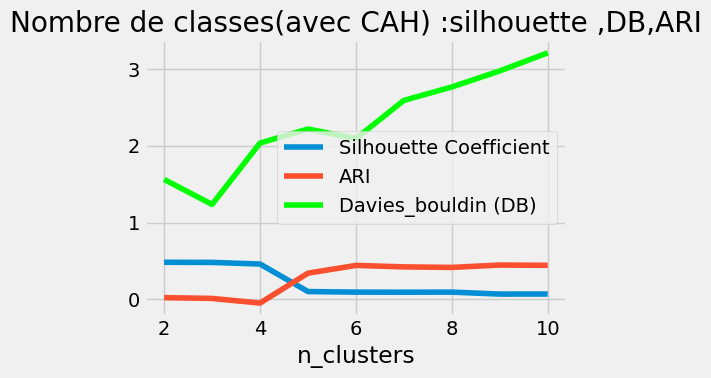

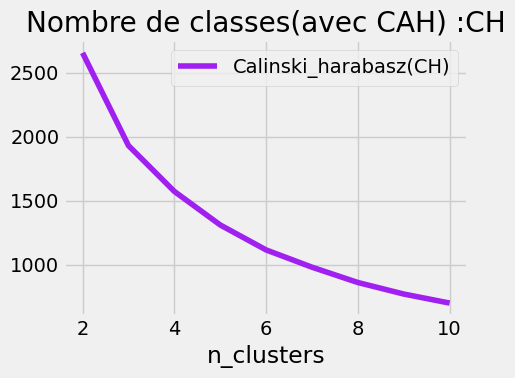

time: 1min 40s (started: 2023-05-18 21:56:46 +00:00)


In [75]:
estimate_k_cah(classic4_word2vec,classic4_labels)

Avec la représentation Word2Vec, en utilisant l'algorithme de clustering CAH avec le linkage Ward, nous avons obtenu des résultats légèrement différents selon les critères utilisés pour estimer le nombre de clusters. Le critère CH indique un nombre de clusters égal à 4, le critère DB indique 3 clusters, tandis que les critères Silhouette et ARI suggèrent un nombre de clusters égal à 5. Bien que les résultats varient légèrement, nous pouvons remarquer que les estimations se situent dans une fourchette proche, ce qui peut indiquer une certaine cohérence dans la structure des données. 

## Classic4 avec la représentation Glove

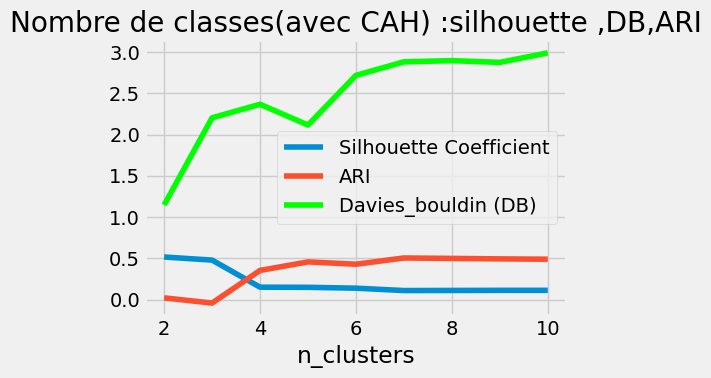

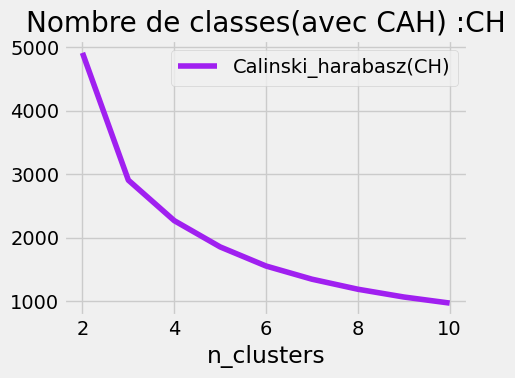

time: 1min 36s (started: 2023-05-18 21:58:26 +00:00)


In [76]:
estimate_k_cah(classic4_glove,classic4_labels)

Lors de l'application du clustering basé sur la méthode CAH (Ward) à la représentation Glove de la dataset Classic4, nous obtenons des résultats cohérents avec différents critères. Le critère CH, le critère DB, le critère de silhouette et le critère ARI indiquent tous un nombre de clusters d'environ 4, ce qui correspond à la véritable valeur pour ce dataset. Ces résultats concordants renforcent notre confiance dans l'estimation du nombre de clusters et suggèrent que 4 clusters sont appropriés pour cette représentation de la dataset Classic4 avec Glove.

# Meilleure représentation

D'après l'étude précédente où nous avons utilisé deux algorithmes de clustering, à savoir K-means et CAH (ward), ainsi que deux représentations différentes, à savoir Glove et Word2Vec, nous pouvons conclure que la meilleure configuration est obtenue avec la représentation Glove et l'algorithme CAH (ward). Cela est basé sur l'analyse des scores obtenus avec différents critères tels que la silhouette, l'ARI, le CH, le DB et le SSE. Ces scores indiquent que la représentation Glove combinée à l'algorithme CAH (ward) offre les meilleurs résultats en termes d'estimation de nombre de clusters optimal.